<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220224_standardization%2Bnormalization_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 표준화(Standardization)
> 데이터 평균 → 0

> 데이터 표준편차 → 1

> 분포를 단순화 + 다른데이터와 비교 용이

In [5]:
print("표준화 공식")
Image(url='https://t1.daumcdn.net/cfile/tistory/999EC6335CDE8D8131', width=100)

표준화 공식


In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris['data'] # (150, 4) shape의 데이터, 4개의 feature로 구성됨
y = iris['target']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
X = x[:, 0] # 첫번째 feature인 "sepal length의 데이터"만 선택해보자

In [9]:
X

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

### X 배열 표준화

In [10]:
X_ = (X-X.mean()) / X.std() # std() : 표준편차

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


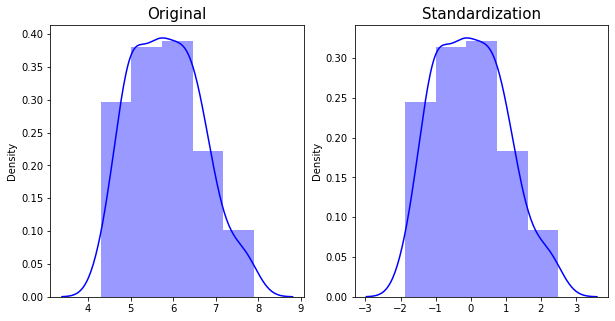

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b') # distribution plot, bins : 그래프 막대를 몇개로 나눌지
plt.title('Original', fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(X_, bins=5, color='b')
plt.title('Standardization', fontsize=15)

plt.show()


# sklearn을 활용한 표준화(Standardization) 방법

In [21]:
from sklearn.preprocessing import StandardScaler # 표준화 = Standardscaler

In [13]:
scaler = StandardScaler()

In [14]:
x_scaled = scaler.fit_transform(x) # (150, 4) 배열 전체를 표준화

x_scaled[:5] # 첫 다섯줄만 보자

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [15]:
round(x_scaled.mean(), 2), x_scaled.std() # 평균과 표준편차 확인

(-0.0, 1.0)

### sns 그래프의 종류별 특징
> distplot()은 1개의 축(중복값 확인)
  - 1개의 축 표준화
  
> scatterplot()은 2개의 축
  - 2개의 축 표준화


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


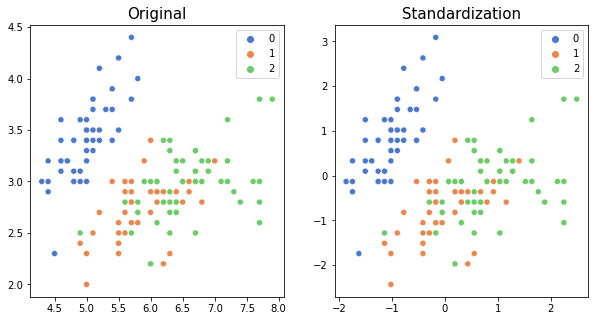

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x[:, 0], x[:,1], hue=y, palette='muted')
plt.title('Original', fontsize=15)

plt.subplot(1, 2, 2)
sns.scatterplot(x_scaled[:, 0], x_scaled[:,1], hue=y, palette='muted')
plt.title('Standardization', fontsize=15)

plt.show()

# 2. 정규화(Nomarlization)
> 모든 데이터 → 0 ~ 1 범위

In [17]:
Image(url='https://mblogthumb-phinf.pstatic.net/MjAxODA3MzFfMjgx/MDAxNTMzMDIxNzg5MTkz.odx32KoGhDrjwJHgjb_NslL1Nlmsp4veLz6OULb2q00g.5Ynl7GOds1YAgBgJ_TSiuWjHZfrNWPq3hsHtwCjvNP0g.PNG.angryking/image_4532734831533021765958.png?type=w800', width=200)

In [18]:
X = x[:, 0]
X

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [19]:
X_ = (X - X.min()) / (X.max() - X.min())
X_

array([0.22222222, 0.16666667, 0.11111111, 0.08333333, 0.19444444,
       0.30555556, 0.08333333, 0.19444444, 0.02777778, 0.16666667,
       0.30555556, 0.13888889, 0.13888889, 0.        , 0.41666667,
       0.38888889, 0.30555556, 0.22222222, 0.38888889, 0.22222222,
       0.30555556, 0.22222222, 0.08333333, 0.22222222, 0.13888889,
       0.19444444, 0.19444444, 0.25      , 0.25      , 0.11111111,
       0.13888889, 0.30555556, 0.25      , 0.33333333, 0.16666667,
       0.19444444, 0.33333333, 0.16666667, 0.02777778, 0.22222222,
       0.19444444, 0.05555556, 0.02777778, 0.19444444, 0.22222222,
       0.13888889, 0.22222222, 0.08333333, 0.27777778, 0.19444444,
       0.75      , 0.58333333, 0.72222222, 0.33333333, 0.61111111,
       0.38888889, 0.55555556, 0.16666667, 0.63888889, 0.25      ,
       0.19444444, 0.44444444, 0.47222222, 0.5       , 0.36111111,
       0.66666667, 0.36111111, 0.41666667, 0.52777778, 0.36111111,
       0.44444444, 0.5       , 0.55555556, 0.5       , 0.58333

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


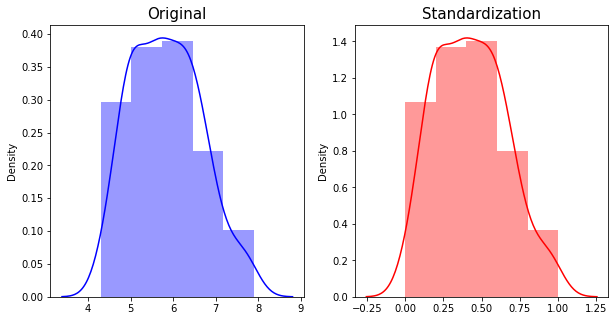

In [20]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.distplot(X, bins=5, color='b')
plt.title('Original', fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(X_, bins=5, color='r')
plt.title('Standardization', fontsize=15)
plt.show()

# sklearn을 활용한 정규화(Normalization) 방법

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
x_scaled = scaler.fit_transform(x) # 표준화/정규화의 fit_transform(x) 함수이름 동일

In [26]:
x_scaled[:5] # 첫 5줄만 보자

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [28]:
x_scaled.min(), x_scaled.max() # 최소값, 최대값 확인

(0.0, 1.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


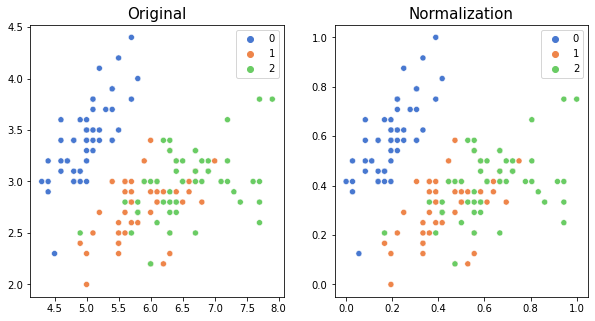

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x[:, 0], x[:, 1], hue=y, palette='muted')
plt.title('Original', fontsize=15)

plt.subplot(1, 2, 2)
sns.scatterplot(x_scaled[:, 0], x_scaled[:, 1], hue=y, palette='muted')
plt.title('Normalization', fontsize=15)
plt.show()